<h1 style='text-align:center'>Python Intro to Plotting Images </h1>

<strong>
    TF: Maurice Wilson<br>
    Astron 100 Section<br>
    Spring 2021
</strong>

Grab a FITS file to work with for this lesson.  Consider the FITS files that are already on your remote computer.  Remember how to securely copy a file from one computer to another?

scp \<username\>@3.231.34.76:~/exercise1/ccd060.fits .



From class, we've learned that FITS files contain data and the general information describing that data is written in the FITS header.  The Astropy module allows us to easily access the header information and the data.

In [1]:
from astropy.io import fits

HDUlist = fits.open('ccd060.fits') # one or more header-data units listed

Although it is rarely done, FITS files can have multiple datasets within one file.  Each header-data unit extracted by astropy allows us to view each dataset and each dataset's header information.  Let's focus on the first (and only) unit in this list of header-data units.

In [3]:
hdu = HDUlist[0]

hdu.header  # beware: using the print command here can potentially ruin the printed alignment of the table columns

SIMPLE  =                    T                     / FITS STANDARD              
BITPIX  =                   16                     / FITS BITS/PIXEL            
NAXIS   =                    2                     / FITS NUMBER OF AXES        
NAXIS1  =                 1806                     / FITS PIX PER ROW           
NAXIS2  =                 1001                     / FITS PIX PER COL           
CHIP    = 'TEK5'                                   / DETECTOR NAME              
TEL     = 'LCO-100'                                / TELESCOPE NAME             
OBJECT  = 'GRB050318'                              / OBJECT NAME                
COMMENT = ''                                       / COMMENT                    
UTSTART = '00:52:09.1'                             / UT OF START FROM TEL       
UTEND   = '00:57:09.1'                             / UT OF END FROM TEL         
FILTERP =                    2                     / FILTER POSITION            
FILTER  = 'R'               

In [40]:
hdu.header['exptime']  # to access the value of a specific field in the header 

300.01

In [39]:
hdu.header.comments['exptime']  # to access the description of a specific field in the header 

'TRUE EXP-TIME IN SEC.'

Let's extract the data described by this header and plot the data as an image.

In [5]:
hdu_data = hdu.data

hdu_data.shape  # see the shape of the data set (similar to how shapes of numpy arrays are found)

(1001, 1806)

In this case, the dataset is arranged in an array with only two dimensions.  We can easily plot a 2D image of this array.

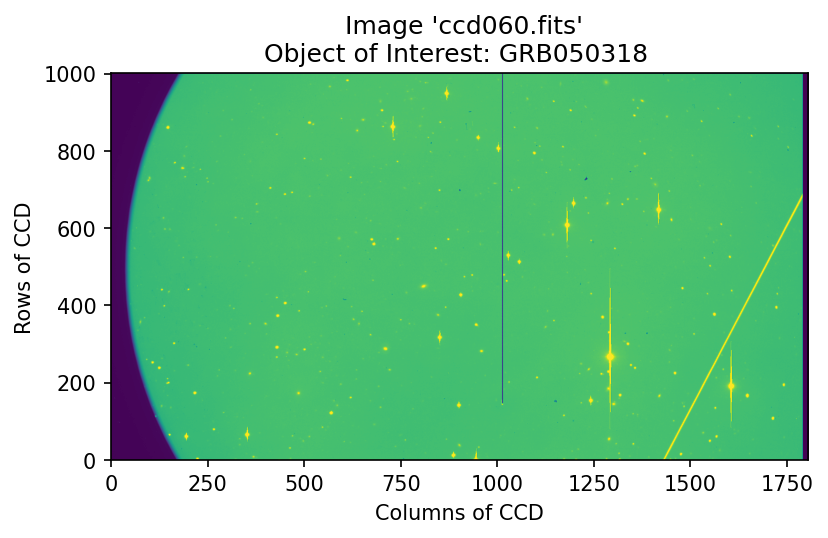

In [9]:
import matplotlib.pyplot as plt

# initiate the figure window to plot in
plt.figure(dpi=150)

# show the 2D array as an image
plt.imshow(hdu_data, origin='lower')

# set up the x-axis and y-axis labels
plt.title(f" Image 'ccd060.fits'\nObject of Interest: {hdu.header['object']} ")
plt.ylabel('Rows of CCD')
plt.xlabel('Columns of CCD')

plt.show() 
plt.close()

As an exercise, try to find out the following:

How would you adjust the color of the image and find out the value that each color represents?

How would you change the contrast and the (currently linear) scale of the image?

There are many different ways to answer these questions.  One way is described in the following algorithm. Consider writing your own code within the steps of this algorithm as you try out this exercise.  (It is wise to write a commented algorithm before writing code.) 


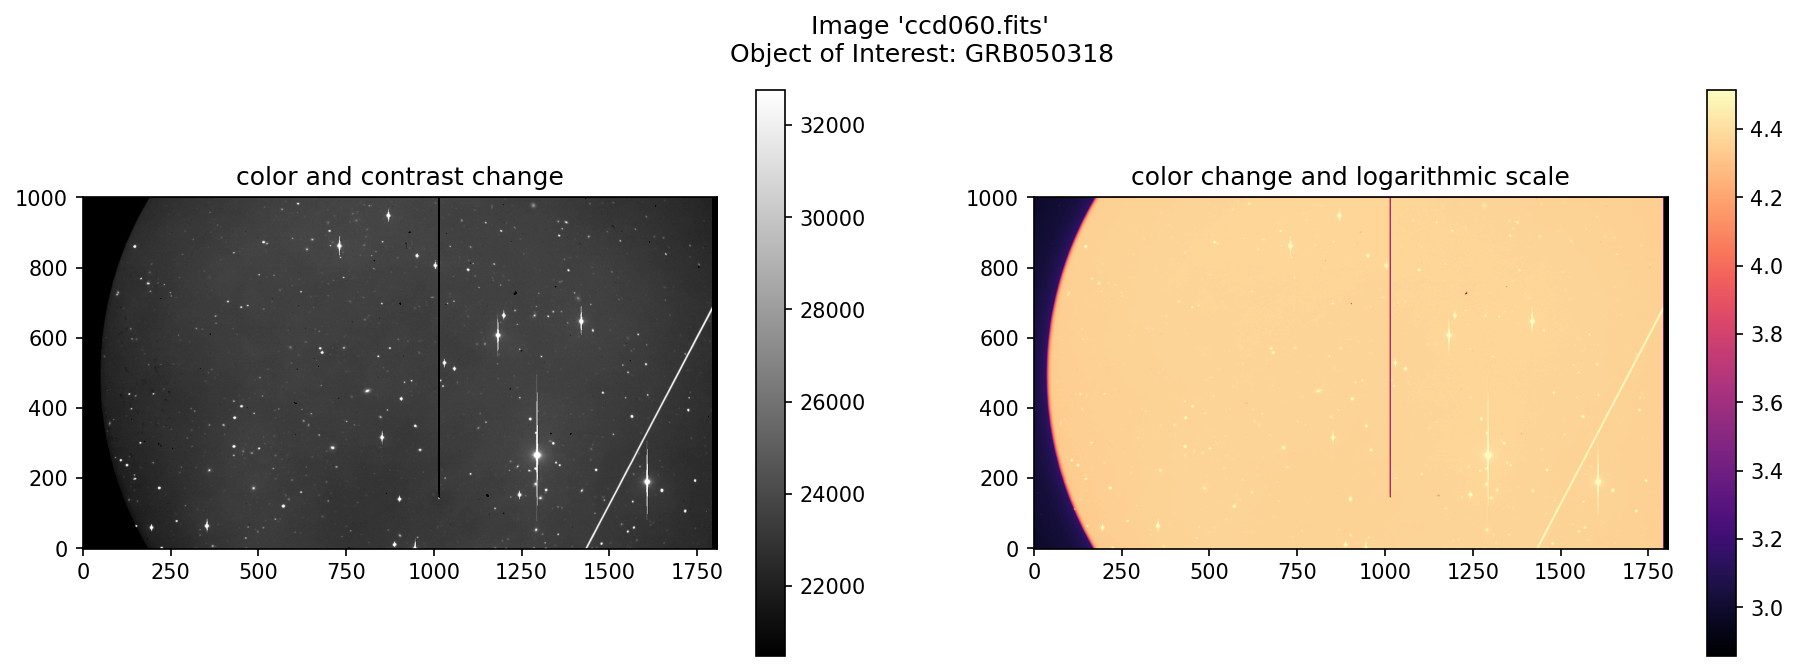

In [32]:

# initiate the figure window to plot in
# <--insert code-->

# decide how to change the color map, contrast, and scaling 
# <--insert code-->

# show the 2D array as an image and show the color bar
# <--insert code-->

# set the labels and titles
# <--insert code-->

# show the plot, save the plot, and close the plot
# <--insert code-->


Let's mark some important features in this plot with text and shapes like the following.  Come up with your own code to produce a similar plot/image.

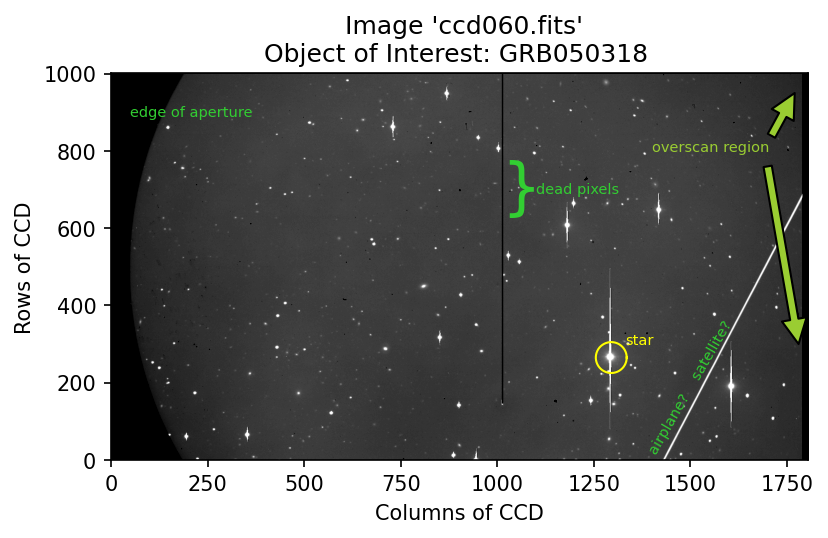

In [73]:
# initiate the figure window to plot in
# <--insert code-->

# show the 2D array as an image
# <--insert code-->


# plot various text at various coordinates on the image
# -- adjust the orientation of the text as necessary
# -- adjust the color and font size as necessary
# <--insert code-->


# plot a circle around the physical image coordinates of a star
# -- for simplicity, just use cosine and sine to get points to plot in a circle
# <--insert code-->


# plot and annotate the arrows
# <--insert code-->


# set up the x-axis and y-axis labels
# <--insert code-->



Let's plot a slice of the data to notice a few features: the aperture's edge, the dead pixels, the bright streak, and the overscan bias region.

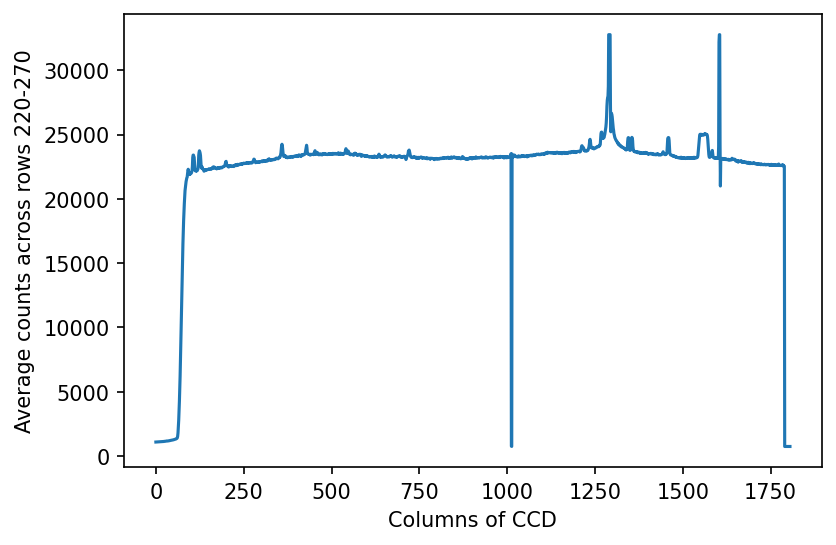

In [74]:
x_indices = np.arange( hdu_data.shape[1] )
z_values =  np.mean( hdu_data[220:271, : ], axis=0 )

plt.figure(dpi=150)

plt.plot( x_indices, z_values )

plt.xlabel('Columns of CCD')
plt.ylabel('Average counts across rows 220-270')
plt.show()